## Final Project Submission

Please fill out:
* Student name: Trevor Jude
* Student pace: Part time
* Scheduled project review date/time: 27/07/2025
* Instructor name: Christine Kirimi
* Blog post URL: N/A
***

# Aviation Accident Analysis 
***

The aviation accident analysis seeks to put to use various Phase 1 concepts such as panda,data analysis ,data visualization and statistical data analysis.

The analysis seeks to answer three key business questions which are:
* What are the major causes of aircraft accidents?
* What's the trend and recent patterns of aircraft accidents from 2010 to 2023?
* What types of aircrafts are likely to be involved in accidents in critical phases of flights?

# Part 1: Loading Data
***

In this section,load the data from the Aviation.Data.csv file which consists of various parameters such as causes of accidents,events dates and locations among other features.

In [1]:
# Import the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 : Read data from the Aviation.Date.csv as a pandas  data frame as df 

In [2]:
#Load the data
df= pd.read_csv('Aviation_Data.csv',parse_dates=['Event.Date'],low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# 1.2 Data cleaning and processing

The first step is to answer the first business question on the recent patterns of aircraft accidents in recent years.First,we will check for missing values and the various data types before dropping missing values.

In [3]:
#Check the file for information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      90348 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [4]:
# Check for missing and data types
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [5]:
#Reviewing columns of dataframe
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
#Droping columns that are not required for answering our Data Analysis Goals
df = df.drop(['Publication.Date','Latitude', 'Country', 'Location', 'Accident.Number',
              'Report.Status', 'Airport.Code', 'Airport.Name', 'Registration.Number', 
              'Air.carrier', 'Amateur.Built', 'Longitude', 'FAR.Description', 'Schedule'],axis=1)

In [7]:
# Replacing NAN values with unkown for the following columns
df['Purpose.of.flight'].fillna(value = 'Unknown', inplace=True)
df['Broad_Phase'] = df['Broad.phase.of.flight'].fillna(value = 'Unknown', inplace=True)

In [8]:
# Normalize the fields by strippin and lower case for consistency
df['Aircraft.Category'] = df['Aircraft.Category'].str.strip().str.upper()
df.head()

,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Broad_Phase
0,20001218X45444,Accident,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,None
1,20001218X45447,Accident,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,None
2,20061025X01555,Accident,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,None
3,20001218X45448,Accident,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,None
4,20041105X01764,Accident,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,None


The data is now cleaned.The next step is to remove non Airplanes from the dataset

# Standardize time and date

In [9]:
# Drop rows with no dates
df= df.dropna(subset=['Event.Date'])

Now that we have dropped the rows missing the event dates,we will continue with the data cleaning process by ensuring that the column is date time and then define the valid years for analysis.

In [10]:
# Ensure the column is date time
df['Event_Year'] = df['Event.Date'].dt.year

In [11]:
#Filter the rows with valid years as from 2010
df= df[df['Event_Year'] >= 2010]

# Part 2: Answering the three business questions

## 2.1 What's the trend and recent patterns of aircraft accidents?

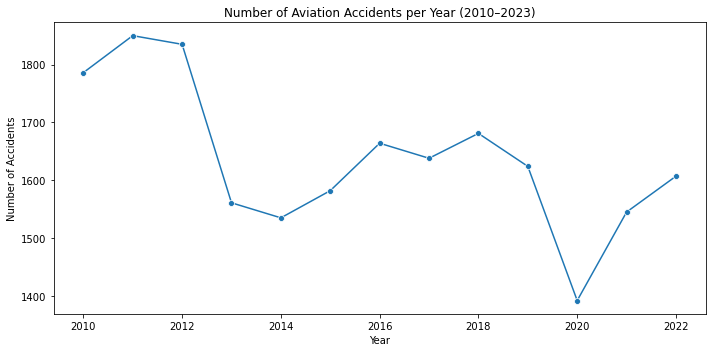

In [12]:
# Accident trends and patterns
accidents_per_year = df.groupby('Event_Year').size()

plt.figure(figsize=(10, 5))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values, marker='o')
plt.title('Number of Aviation Accidents per Year (2010–2023)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

## 2.2  Check the fatalities trend in recent years

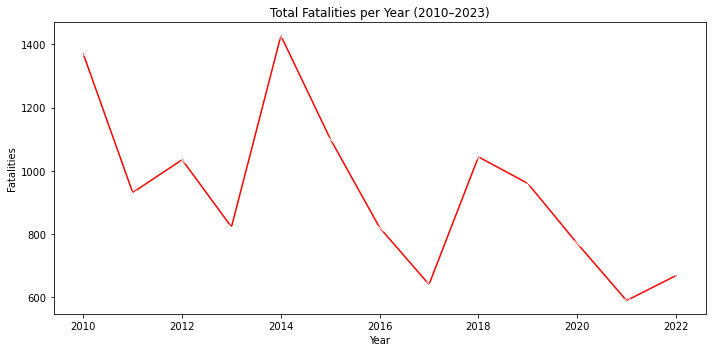

In [13]:
# Check the fatality rate of aviation accidents in recent times

fatalities_per_year = df.groupby('Event_Year')['Total.Fatal.Injuries'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=fatalities_per_year.index, y=fatalities_per_year.values, marker='x', color='red')
plt.title('Total Fatalities per Year (2010–2023)')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.tight_layout()
plt.show()


## 2.3 What types of aircrafts are likely to be involved in accidents?

In [14]:
# Clean aircraft type column
df['Aircraft.Category'] = df['Aircraft.Category'].astype(str).str.strip().str.upper()


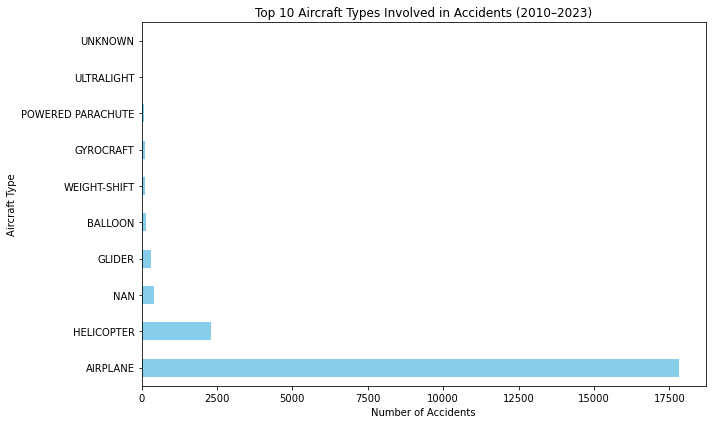

In [15]:
# Count most common aircraft types involved in accidents
top_aircraft = df['Aircraft.Category'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
top_aircraft.plot(kind='barh', color='skyblue')
plt.title('Top 10 Aircraft Types Involved in Accidents (2010–2023)')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Type')
plt.tight_layout()
plt.show()

# 2.4 What types of aircrafts are likely to be involved in accidents in critical phases of flights?

In [16]:
# Clean/standardize phase of flight column
df['Broad_Phase'] = df['Broad.phase.of.flight'].str.strip().str.upper()

In [17]:
# Filter for critical phases
critical_phases = ['TAKEOFF', 'APPROACH', 'LANDING']
critical_df = df[df['Broad_Phase'].isin(critical_phases)]

# Count how many accidents each aircraft had in critical phases
critical_counts = critical_df['Aircraft.Category'].value_counts()

# Normalize by total accidents for each type
total_counts = df['Aircraft.Category'].value_counts()
critical_risk_ratio = (critical_counts / total_counts).dropna().sort_values()

print("Aircraft types with lowest % of critical phase accidents:")
print(critical_risk_ratio.head(10))

Aircraft types with lowest % of critical phase accidents:
Series([], Name: Aircraft.Category, dtype: float64)


# Visualize risk using a simple bar chart

Clean the data and define low fatal accidents 

In [18]:
# Define fatal injuries
df['Fatal'] = df['Total.Fatal.Injuries'].fillna(0).astype(int) > 0

# Group by aircraft category and compute fatal accident rate
fatal_rates = df.groupby('Aircraft.Category')['Fatal'].mean()

# Filter to only aircraft with 10+ accidents to avoid noise from rare aircraft
accident_counts = df['Aircraft.Category'].value_counts()
valid_types = accident_counts[accident_counts >= 10].index
low_fatal_risk = fatal_rates.loc[valid_types].sort_values()


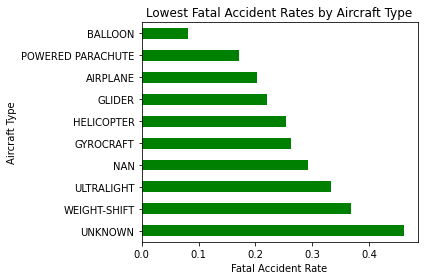

In [19]:
low_fatal_risk.head(10).plot(kind='barh', color='green')
plt.title('Lowest Fatal Accident Rates by Aircraft Type')
plt.xlabel('Fatal Accident Rate')
plt.ylabel('Aircraft Type')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Conclusion

In summary,aircraft accidents have reducing over the years.The number of fatalities has reduced significantly since 2010 with the exception of 2014,before the continued reduction of fatalities.Airplanes are considered as the most types of aircrafts involved in accidents over the years.

In [20]:
# Export cleaned data as a csv
df.to_csv('Cleaned data.csv', index=False)